<a href="https://colab.research.google.com/github/Aditypitty/Heartattack-Risk-Prediction/blob/main/Heart_Attack_Risk_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project name:- Heart Attack risk perdictor

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.tail(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
df = df.drop(['oldpeak', 'thal', 'slope'], axis=1, errors='ignore')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,ca,target
0,63,1,3,145,233,1,0,150,0,0,1
1,37,1,2,130,250,0,1,187,0,0,1
2,41,0,1,130,204,0,0,172,0,0,1
3,56,1,1,120,236,0,1,178,0,0,1
4,57,0,0,120,354,0,1,163,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0,0
299,45,1,3,110,264,0,1,132,0,0,0
300,68,1,0,144,193,1,1,141,0,2,0
301,57,1,0,130,131,0,1,115,1,1,0


In [ ]:
df.shape

(303, 11)

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
ca,0


In [ ]:
df.corr()#corelated

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,ca,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.276326,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.118261,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.181053,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.101389,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.070511,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.137979,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.072042,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.213177,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.115739,-0.436757
ca,0.276326,0.118261,-0.181053,0.101389,0.070511,0.137979,-0.072042,-0.213177,0.115739,1.000000,-0.391724


<Axes: >

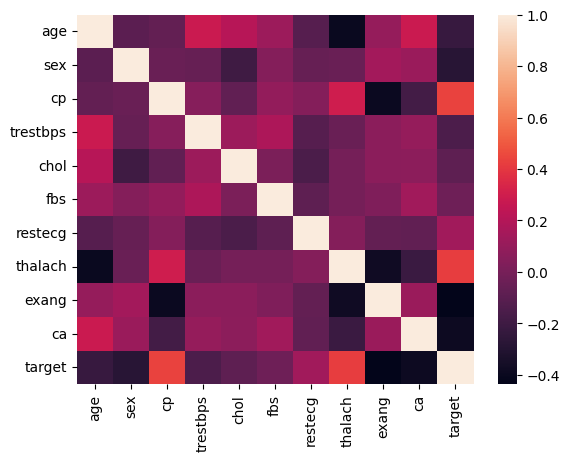

In [ ]:
sns.heatmap(df.corr())

<ipython-input-116-51abd9d9c41f>:4: UserWarning: 
The palette list has fewer values (10) than needed (41) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x ='age',data=df,palette=sns.color_palette("colorblind"))


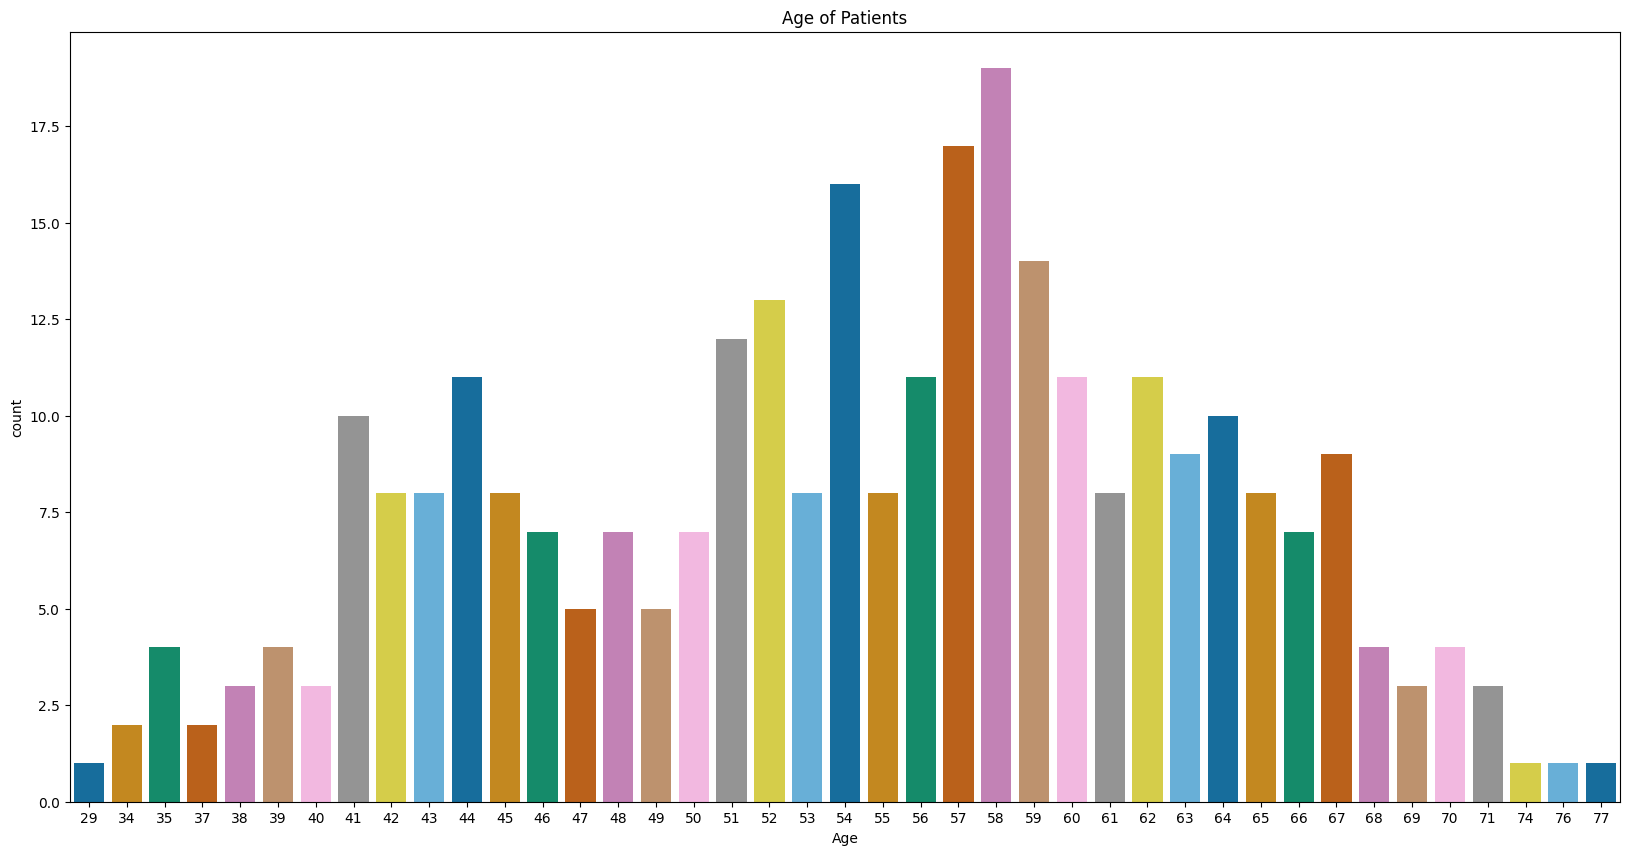

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Age of Patients")
plt.xlabel("Age")
sns.countplot(x ='age',data=df,palette=sns.color_palette("colorblind"))
plt.show()

<ipython-input-117-fbaf4eac37af>:3: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(x='sex',data=df,palette=sns.color_palette("colorblind"))


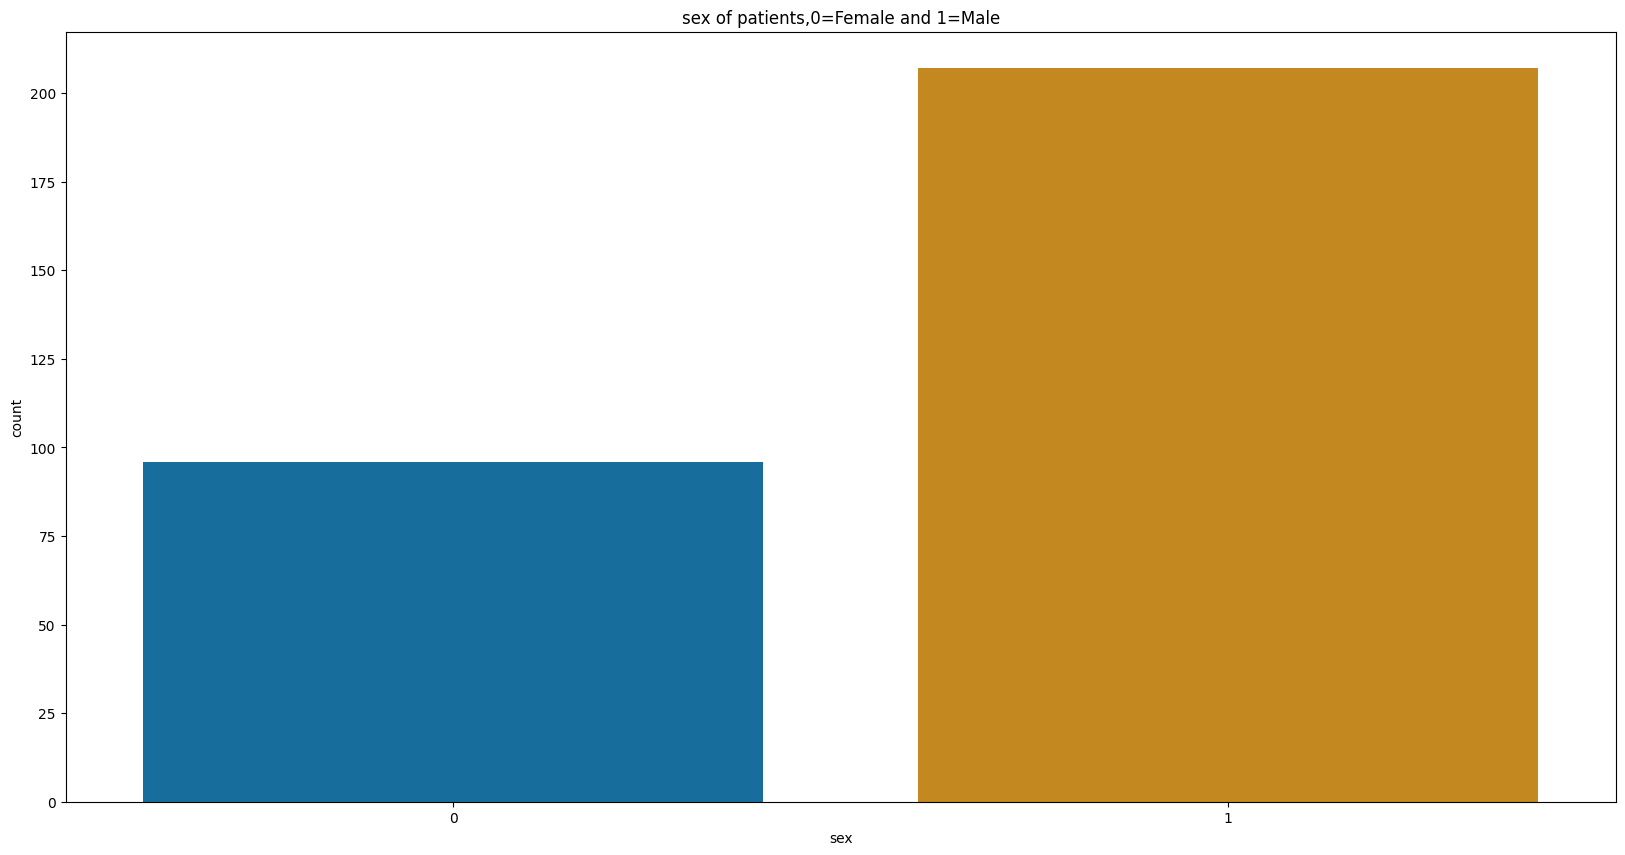

In [ ]:
plt.figure(figsize=(20,10))
plt.title("sex of patients,0=Female and 1=Male")
sns.countplot(x='sex',data=df,palette=sns.color_palette("colorblind"))
plt.show()

In [ ]:
cp_data=df['cp'].value_counts().reset_index()
cp_data

,cp,count
0,0,143
1,2,87
2,1,50
3,3,23


In [ ]:
cp_data = df['cp'].value_counts().reset_index()
cp_data.columns = ['cp_type', 'count']  # Rename columns explicitly

# Rename categories
cp_data.iloc[3, 0] = 'Asymptomatic'
cp_data.iloc[2, 0] = 'Non-Anginal'
cp_data.iloc[1, 0] = 'Atypical Angina'
cp_data.iloc[0, 0] = 'Typical Angina'

print(cp_data)


           cp_type  count
0   Typical Angina    143
1  Atypical Angina     87
2      Non-Anginal     50
3     Asymptomatic     23


<ipython-input-120-445d51b9dd04>:4: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(x='cp_type', y='count', data=cp_data, palette=sns.color_palette("colorblind"))


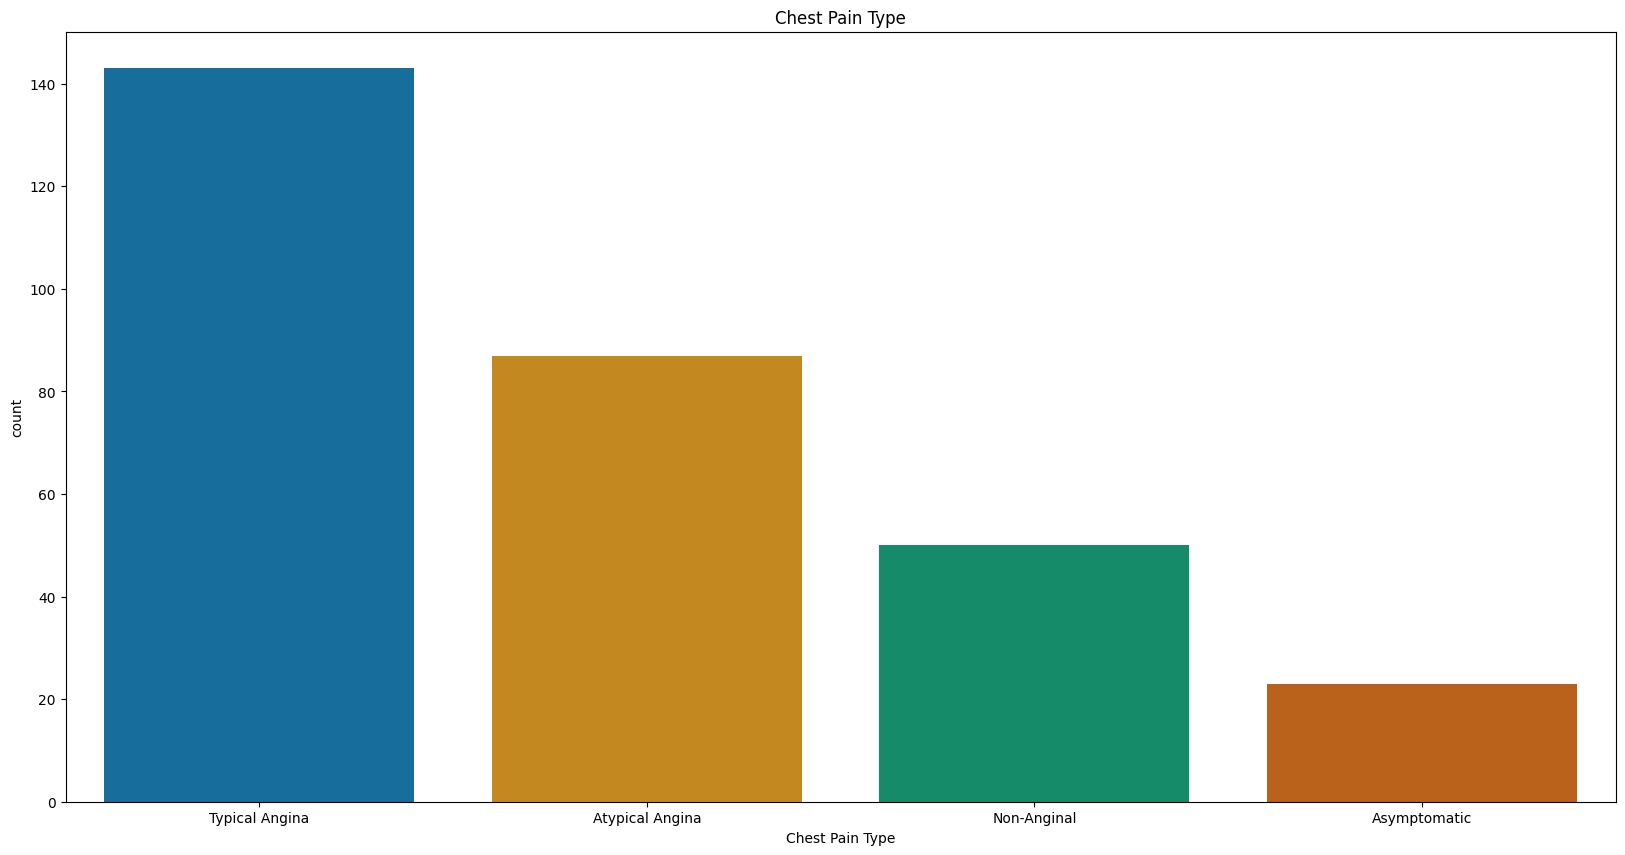

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Chest Pain Type")
plt.xlabel("Chest Pain Type")
sns.barplot(x='cp_type', y='count', data=cp_data, palette=sns.color_palette("colorblind"))
plt.show()

In [ ]:
ecg_data=df['restecg'].value_counts().reset_index()
ecg_data

,restecg,count
0,1,152
1,0,147
2,2,4


In [ ]:
ecg_data = df['restecg'].value_counts().reset_index()
ecg_data.columns = ['ecg_type', 'count']  # Renaming columns explicitly

# Renaming ECG categories
ecg_data.iloc[0, 0] = 'Normal'
ecg_data.iloc[1, 0] = 'ST-T wave abnormality'
ecg_data.iloc[2, 0] = 'Probable left ventricular hypertrophy (Estes)'

print(ecg_data)


                                        ecg_type  count
0                                         Normal    152
1                          ST-T wave abnormality    147
2  Probable left ventricular hypertrophy (Estes)      4


<ipython-input-123-b855906d74bb>:4: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.barplot(x='ecg_type', y='count', data=ecg_data, palette=sns.color_palette("colorblind"))


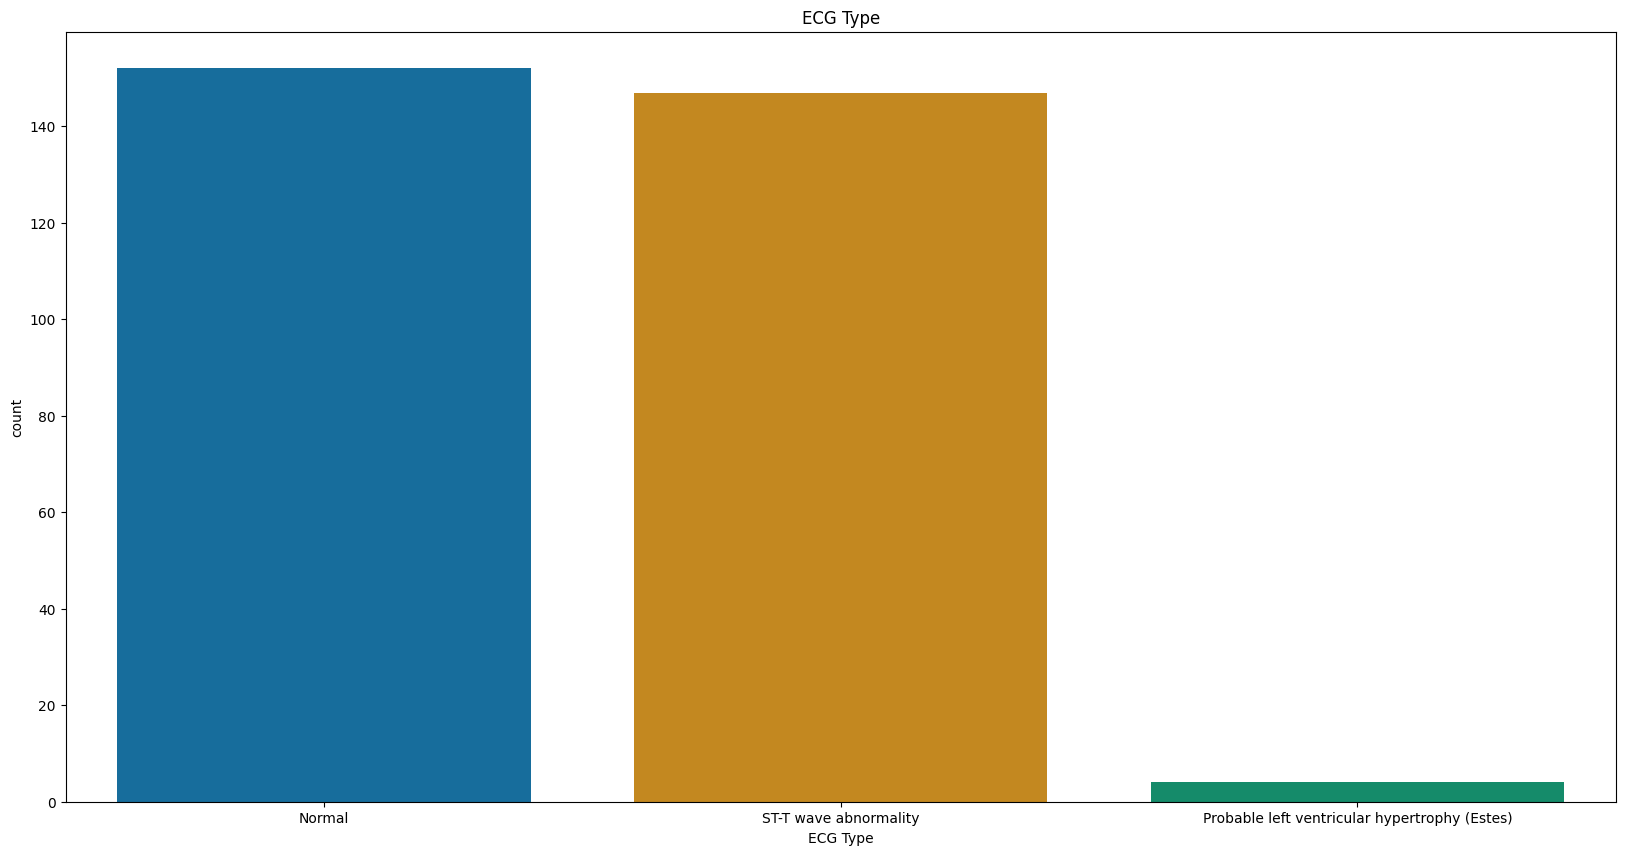

In [ ]:
plt.figure(figsize=(20,10))
plt.title("ECG Type")
plt.xlabel("ECG Type")
sns.barplot(x='ecg_type', y='count', data=ecg_data, palette=sns.color_palette("colorblind"))
plt.show()

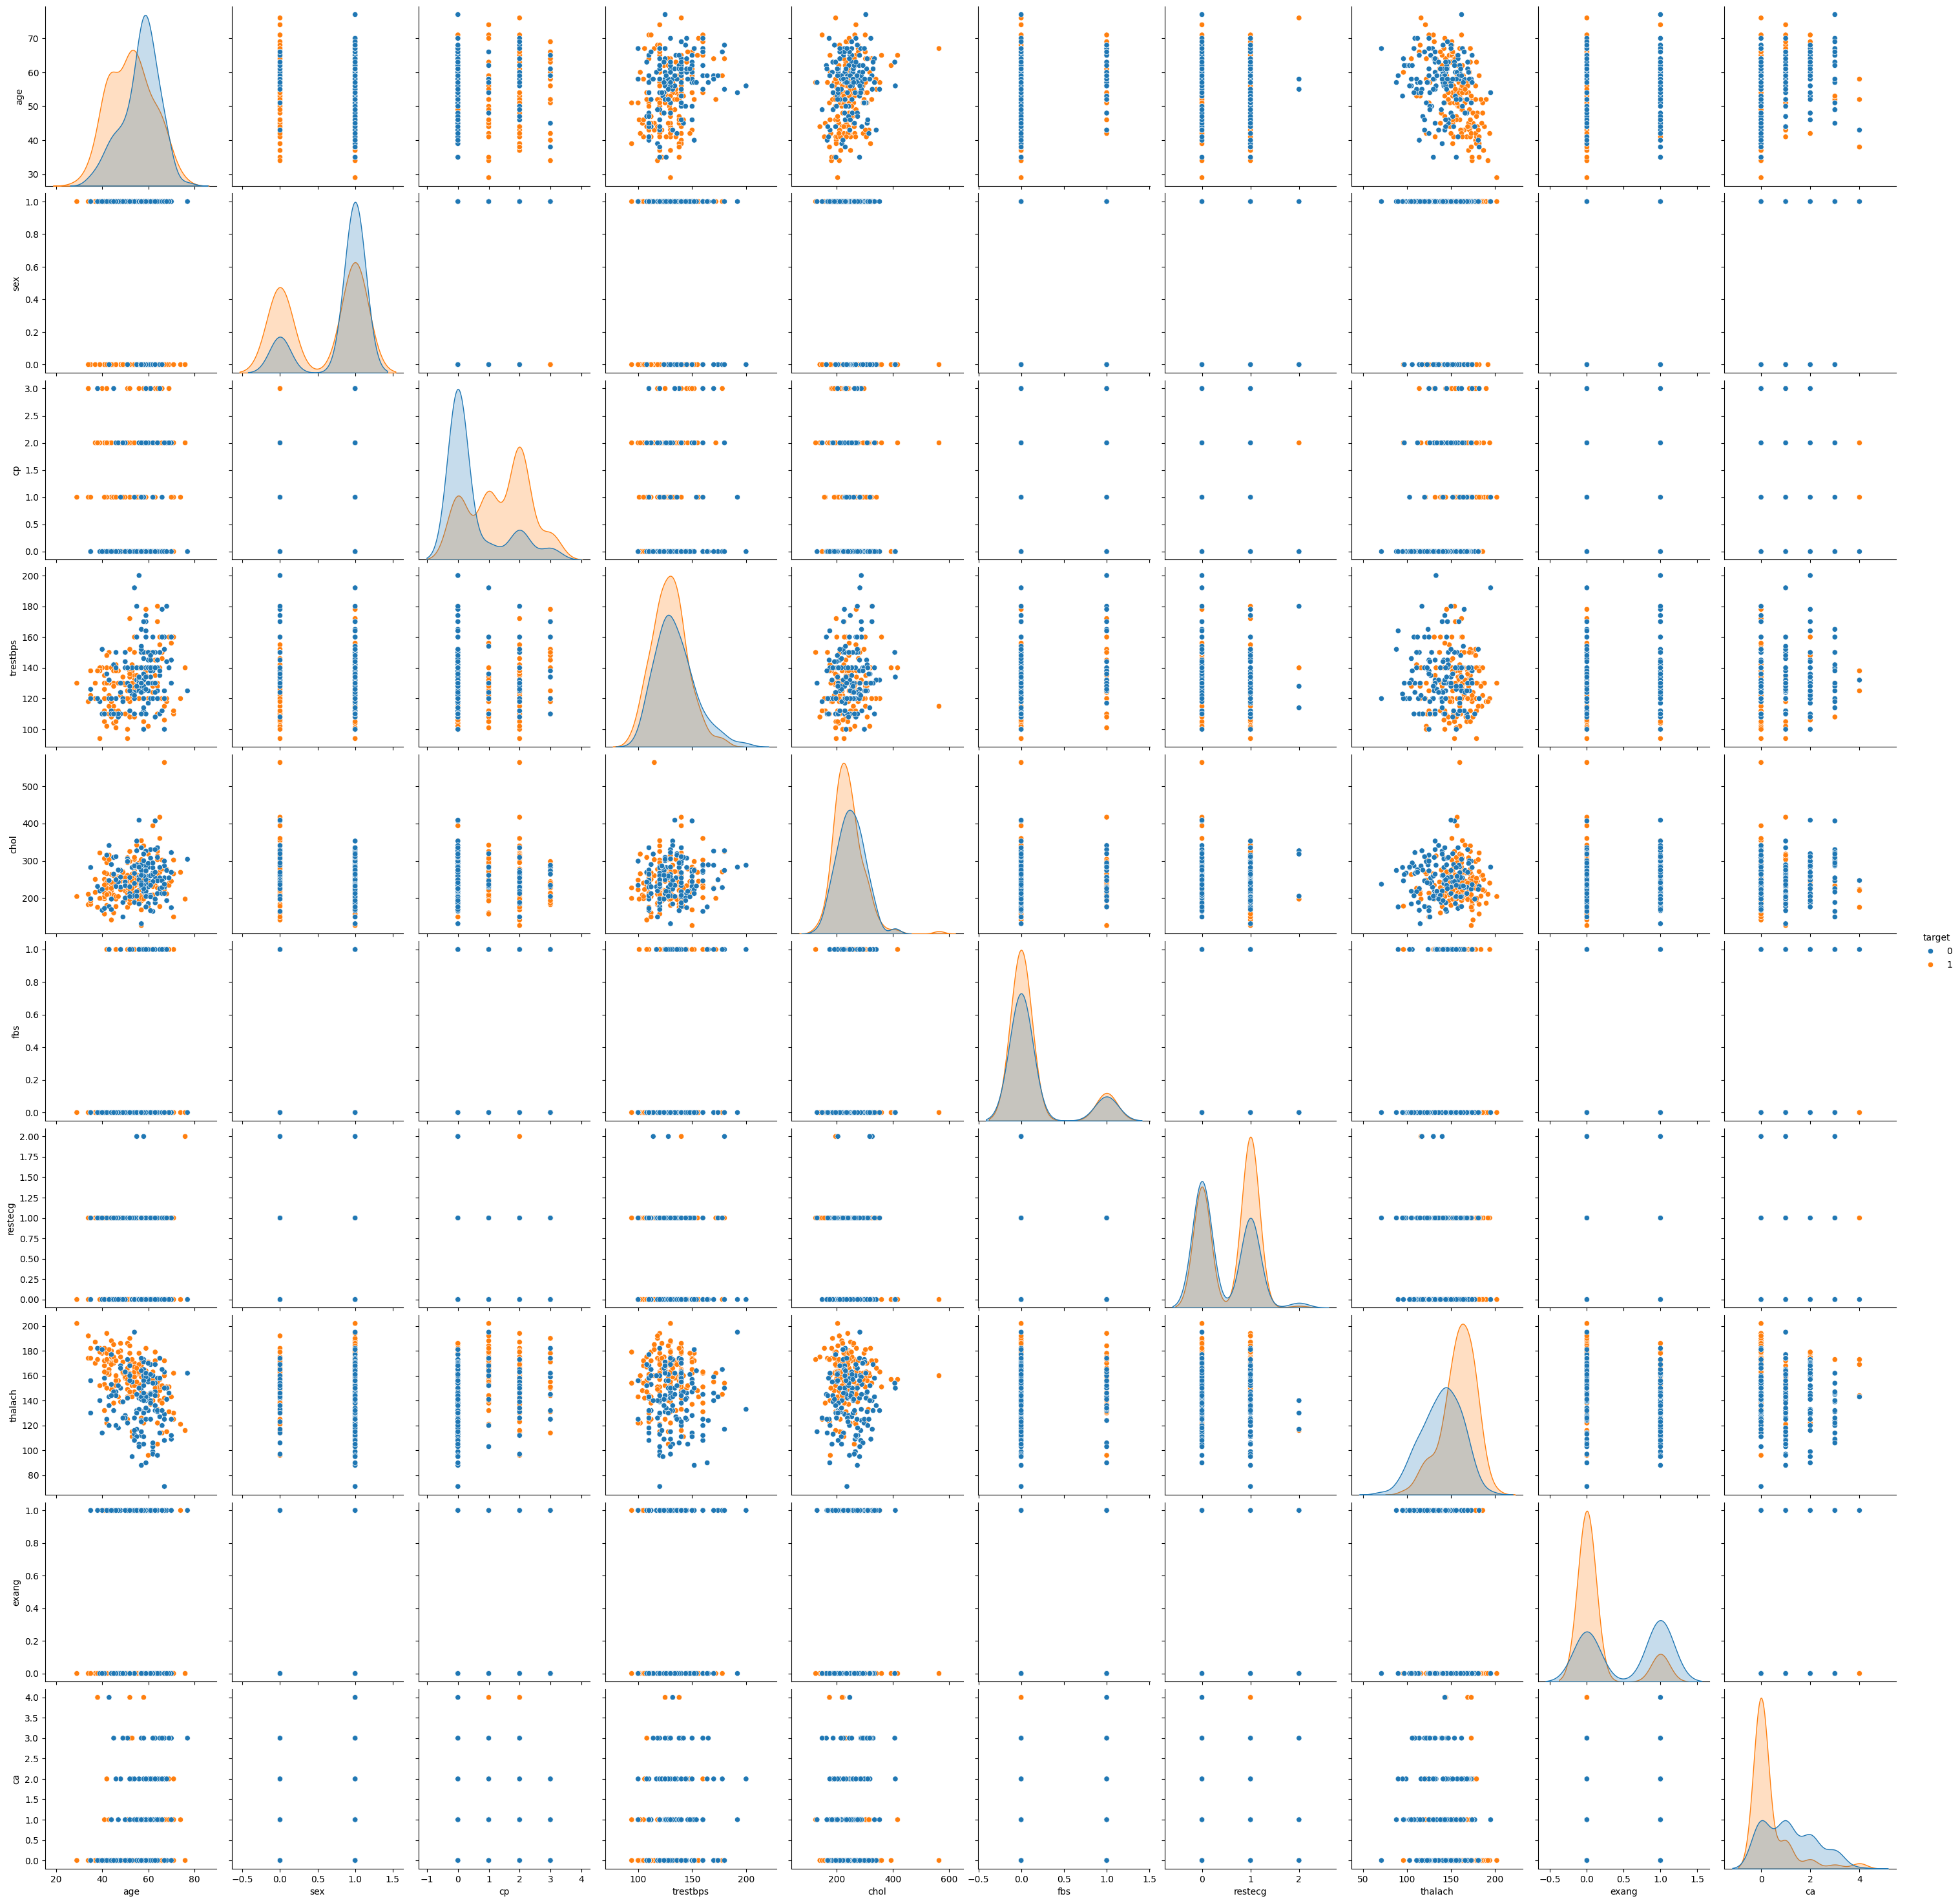

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue='target', height=3)
plt.show()


In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'ca', 'target'],
      dtype='object')

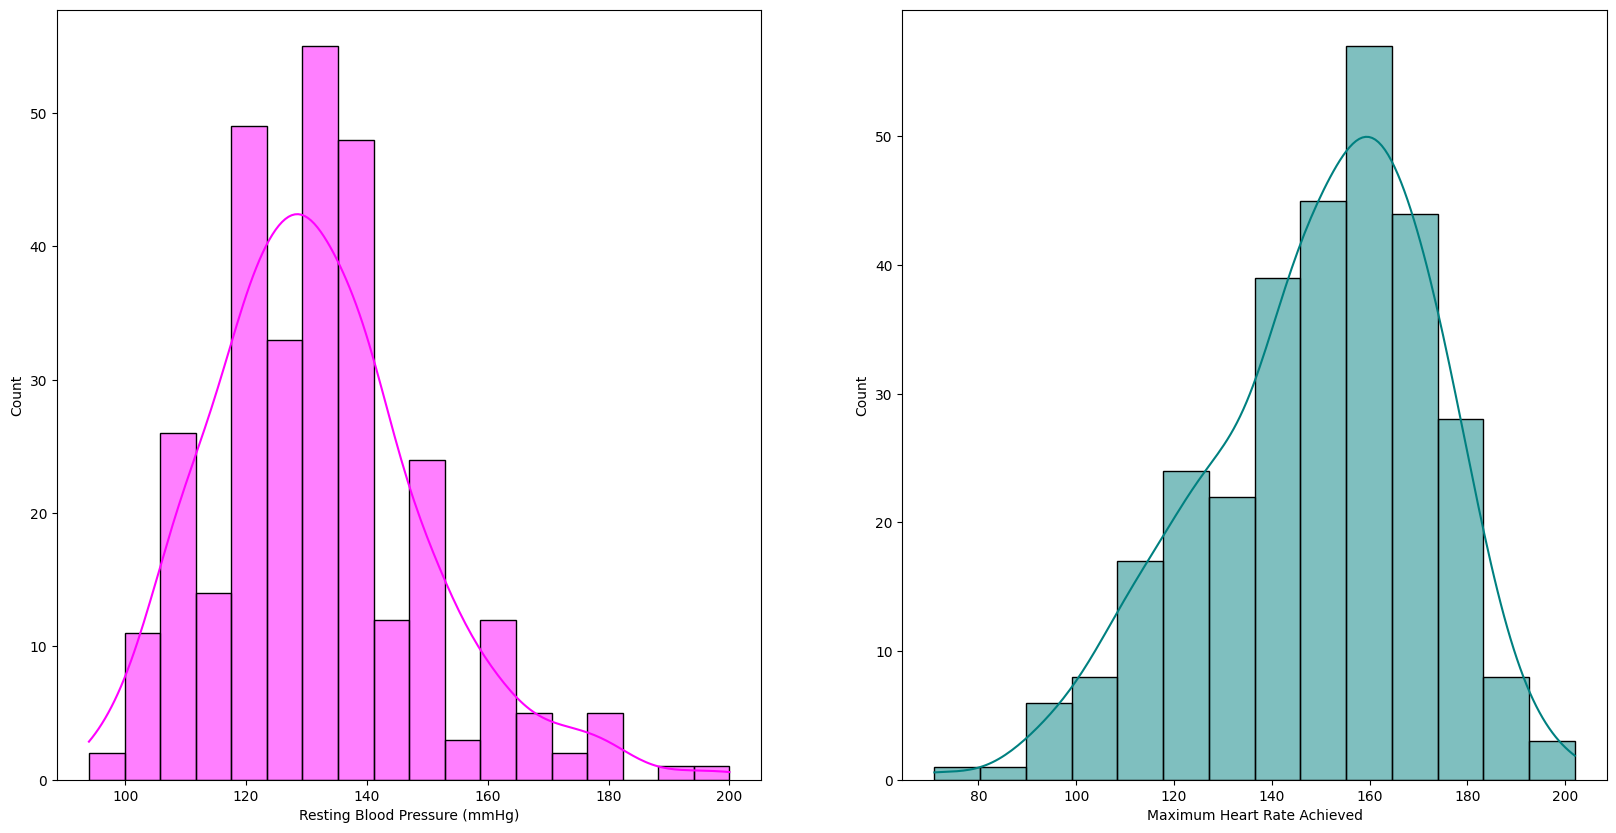

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

# First subplot: Distribution of Resting Blood Pressure
plt.subplot(1, 2, 1)
sns.histplot(df['trestbps'], kde=True, color='magenta')
plt.xlabel("Resting Blood Pressure (mmHg)")

# Second subplot: Distribution of Maximum Heart Rate Achieved
plt.subplot(1, 2, 2)
sns.histplot(df['thalach'], kde=True, color='teal')
plt.xlabel("Maximum Heart Rate Achieved")

plt.show()


<ipython-input-127-43703d704445>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['chol'], kde=True, color ='red')


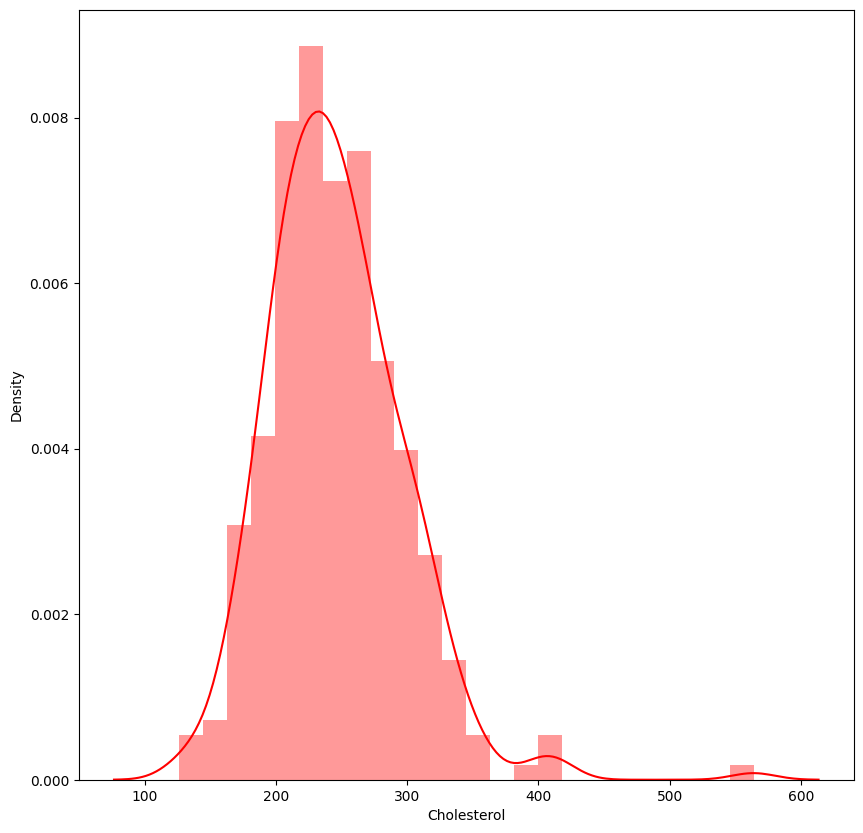

In [ ]:
plt.figure(figsize=(10,10))
sns.distplot(df['chol'], kde=True, color ='red')
plt.xlabel("Cholesterol")
plt.show()

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,ca,target
0,63,1,3,145,233,1,0,150,0,0,1
1,37,1,2,130,250,0,1,187,0,0,1
2,41,0,1,130,204,0,0,172,0,0,1
3,56,1,1,120,236,0,1,178,0,0,1
4,57,0,0,120,354,0,1,163,1,0,1


In [ ]:
#LOGISTIC REGRESSION

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scale = StandardScaler()

In [ ]:
scale.fit(df)

StandardScaler()

In [ ]:
df= scale.transform(df)

In [ ]:
df=pd.DataFrame(df,columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','ca','output'])

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,ca,output
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,-0.714429,0.914529
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,-0.714429,0.914529
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,-0.714429,0.914529
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.714429,0.914529
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.714429,0.914529


In [ ]:
x = df.iloc[:,:-1]
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,ca
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,-0.714429
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,-0.714429
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,-0.714429
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.714429
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.714429
...,...,...,...,...,...,...,...,...,...,...
298,0.290464,-1.468418,-0.938515,0.478391,-0.101730,-0.417635,0.898962,-1.165281,1.435481,-0.714429
299,-1.033002,0.681005,1.973123,-1.234996,0.342756,-0.417635,0.898962,-0.771706,-0.696631,-0.714429
300,1.503641,0.681005,-0.938515,0.706843,-1.029353,2.394438,0.898962,-0.378132,-0.696631,1.244593
301,0.290464,0.681005,-0.938515,-0.092738,-2.227533,-0.417635,0.898962,-1.515125,1.435481,0.265082


In [ ]:
y = df.iloc[:,-1:]
y

,output
0,0.914529
1,0.914529
2,0.914529
3,0.914529
4,0.914529
...,...
298,-1.093459
299,-1.093459
300,-1.093459
301,-1.093459


In [ ]:
from sklearn.model_selection import train_test_split

# Correcting test_size and fixing the syntax
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)


In [ ]:
logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
lbl = LabelEncoder()

In [ ]:
encoded_y = lbl.fit_transform(y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
logreg = LogisticRegression()

In [ ]:
logreg= LogisticRegression()
logreg.fit(x_train, encoded_y)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
encoded_ytest= lbl.fit_transform(y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_pred1 = logreg.predict(x_test)
lr_conf_matrix = confusion_matrix(encoded_ytest, y_pred1)
lr_acc_score = accuracy_score(encoded_ytest, y_pred1)


In [ ]:
lr_conf_matrix

array([[35,  9],
       [ 4, 43]])

In [ ]:
print(lr_acc_score*100,"%")

85.71428571428571 %


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree= DecisionTreeClassifier()

In [ ]:
tree.fit(x_train, encoded_y)

DecisionTreeClassifier()

In [ ]:
ypred2 = tree.predict(x_test)

In [ ]:
encoded_ytest= lbl.fit_transform(y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
tree_conf_matrix = confusion_matrix(encoded_ytest, ypred2)
tree_acc_score = accuracy_score(encoded_ytest, ypred2)

In [ ]:
tree_conf_matrix

array([[26, 18],
       [10, 37]])

In [ ]:
print(tree_acc_score*100,"%")

69.23076923076923 %


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(x_train, encoded_y)

RandomForestClassifier()

In [ ]:
ypred3 = rf.predict(x_test)

In [ ]:
rt_conf_matrix = confusion_matrix(encoded_ytest, ypred3)
rt_acc_score = accuracy_score(encoded_ytest, ypred3)

In [ ]:
rt_conf_matrix

array([[31, 13],
       [ 5, 42]])

In [ ]:
print(rt_acc_score*100,"%")

80.21978021978022 %


K Nearest Neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,encoded_y)
    pred= knn.predict(x_test)
    error_rate.append(np.mean(pred!=encoded_ytest))


Text(0, 0.5, 'Error rate')

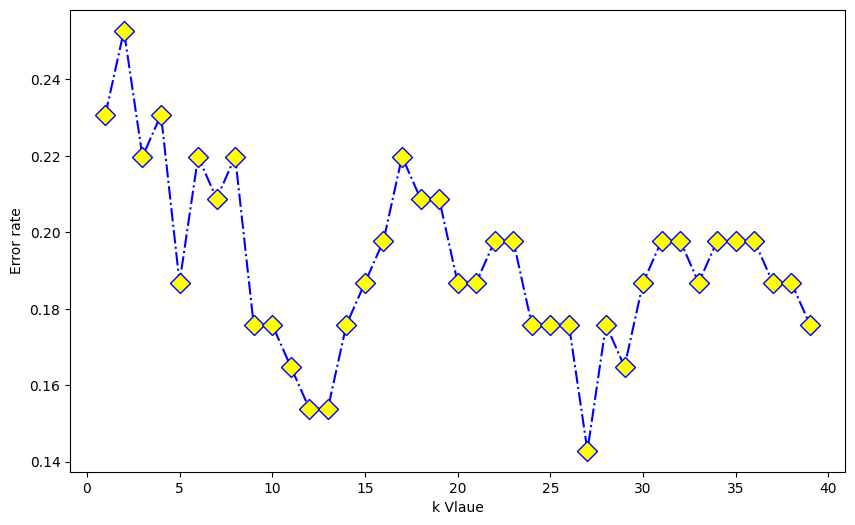

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle= '-.',marker='D',markerfacecolor='Yellow',markersize=10)
plt.xlabel('k Vlaue')
plt.ylabel('Error rate')

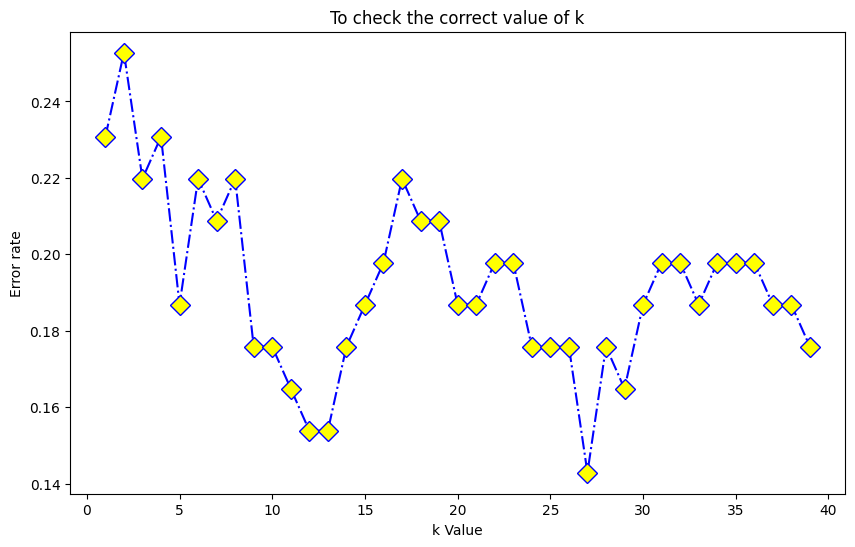

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle= '-.',marker='D',markerfacecolor='Yellow',markersize=10)
plt.xlabel('k Value')
plt.ylabel('Error rate')
plt.title('To check the correct value of k')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(x_train, encoded_y)
ypred4 = knn.predict(x_test)

In [ ]:
knn_conf_matrix = confusion_matrix(encoded_ytest, ypred4)
knn_acc_score = accuracy_score(encoded_ytest, ypred4)

In [ ]:
knn_conf_matrix

array([[35,  9],
       [ 5, 42]])

In [ ]:
print(knn_acc_score*100,"%")

84.61538461538461 %


Support Vector Machine

In [ ]:
from sklearn import svm

In [ ]:
svm= svm.SVC()

In [ ]:
svm.fit(x_train, encoded_y)

SVC()

In [ ]:
ypred5= svm.predict(x_test)

In [ ]:
svm_conf_matrix = confusion_matrix(encoded_ytest, ypred5)
svm_acc_score = accuracy_score(encoded_ytest, ypred5)

In [ ]:
svm_conf_matrix

array([[34, 10],
       [ 8, 39]])

In [ ]:
print(svm_acc_score*100,"%")

80.21978021978022 %


In [ ]:
import pandas as pd

# Assuming accuracy scores exist
model_acc = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'SVM'],
    'Accuracy': [lr_acc_score * 100, tree_acc_score * 100, rt_acc_score * 100, knn_acc_score * 100, svm_acc_score * 100]
})

# Sorting by accuracy
model_acc = model_acc.sort_values(by='Accuracy', ascending=False)

# Display the DataFrame
print(model_acc)


                 Model   Accuracy
0  Logistic Regression  85.714286
3                  KNN  84.615385
2        Random Forest  80.219780
4                  SVM  80.219780
1        Decision Tree  69.230769


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

svm_model = SVC(probability=True, random_state=0)

adab = AdaBoostClassifier(
    estimator=svm_model,
    n_estimators=100,
    algorithm='SAMME',
    learning_rate=0.1,
    random_state=0
)

In [ ]:
adab.fit(x_train, encoded_y)

AdaBoostClassifier(algorithm='SAMME',
                   estimator=SVC(probability=True, random_state=0),
                   learning_rate=0.1, n_estimators=100, random_state=0)

In [ ]:
ypred6=adab.predict(x_test)

In [ ]:
adab_conf_matrix = confusion_matrix(encoded_ytest, ypred6)
adab_acc_score = accuracy_score(encoded_ytest, ypred6)

In [ ]:
adab_conf_matrix

array([[ 0, 44],
       [ 0, 47]])

In [ ]:
print(adab_acc_score*100,"%")

51.64835164835166 %


In [ ]:
adab.score(x_train,encoded_y)

0.5566037735849056

In [ ]:
adab.score(x_test,encoded_ytest)

0.5164835164835165

In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
model_acc

,Model,Accuracy
0,Logistic Regression,85.714286
3,KNN,84.615385
2,Random Forest,80.219780
4,SVM,80.219780
1,Decision Tree,69.230769


In [ ]:
param_grid={
    'solver':['newton-cg','lbfgs','liblinear','sag','saga'],
    'penalty':['none', 'l1','l2','elasticnet'],
    'C':[100,10,1.0,0.1,0.01]

}

In [ ]:
grid1=GridSearchCV(LogisticRegression(),param_grid)

In [ ]:
grid1.fit(x_train,encoded_y)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
325 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
125 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/util

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [ ]:
grid1.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}

In [ ]:
logreg1=LogisticRegression(C=0.01,penalty='l2',solver='liblinear')

In [ ]:
logreg1.fit(x_train,encoded_y)

LogisticRegression(C=0.01, solver='liblinear')

In [ ]:
logreg_pred=logreg1.predict(x_test)

In [ ]:
logreg_pred_conf_matrix = confusion_matrix(encoded_ytest,logreg_pred)
logreg_pred_acc_score = accuracy_score(encoded_ytest, logreg_pred)

In [ ]:
logreg_pred_conf_matrix

array([[33, 11],
       [ 6, 41]])

In [ ]:
print(logreg_pred_acc_score *100,"%")

81.31868131868131 %


In [ ]:
n_neighbors = range(1,21,2)
weights = ['uniform','distance']
metric = ['euclidean','manhattan','minkowski']

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
grid_search.best_params_

{'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}

In [ ]:
knn_pred_conf_matrix

array([[33, 11],
       [ 5, 42]])

In [ ]:
print(knn_pred_acc_score*100,"%")

82.41758241758241 %


In [ ]:
kernel = ['poly','rbf','sigmoid']
C = [50,10,1.0,0.1,0.01]
gamma = ['scale']

In [ ]:
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=svm, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)


In [ ]:
grid_search.fit(x_train,encoded_y)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=0, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [50, 10, 1.0, 0.1, 0.01], 'gamma': ['scale'],
                         'kernel': ['poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [ ]:
grid_search.best_params_

{'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}

In [ ]:
from sklearn.svm import SVC

In [ ]:
SVC = SVC(C=0.1,gamma='scale',kernel='sigmoid')



In [ ]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(x_train, encoded_y)


SVC()

In [ ]:
from sklearn.svm import SVC

svc_model = SVC()

# Step 2: Train the model
svc_model.fit(x_train, encoded_y)

# Step 3: Make predictions
svm_pred = svc_model.predict(x_test)

# Print predictions
print(svm_pred)


[0 1 1 1 0 1 1 0 0 1 0 1 0 0 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1
 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 1 0
 1 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0]


In [ ]:
svm_pred_conf_matrix = confusion_matrix(encoded_ytest, svm_pred)
svm_pred_acc_score = accuracy_score(encoded_ytest, svm_pred)

In [ ]:
svm_pred_conf_matrix

array([[34, 10],
       [ 8, 39]])

In [ ]:
print(svm_pred_acc_score*100,"%")

80.21978021978022 %


In [ ]:
logreg = LogisticRegression()
logreg = LogisticRegression()
logreg.fit(x_train,encoded_y)

LogisticRegression()

In [ ]:
y_pred1

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0])

In [ ]:
lr_conf_matrix

array([[35,  9],
       [ 4, 43]])

In [ ]:
print(lr_acc_score*100,"%")

85.71428571428571 %


In [ ]:
#confusion matrix of model enlarged

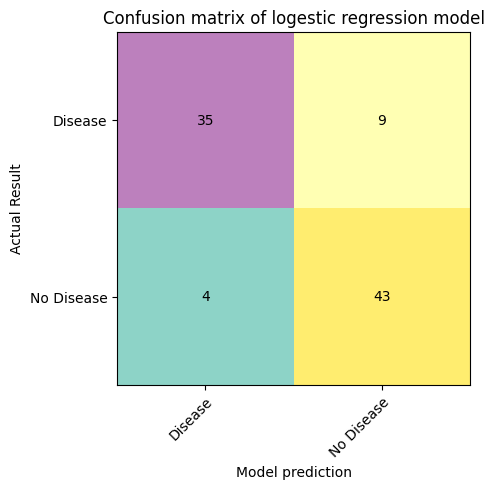

ACCURACY of our model is 85.71428571428571 %


In [ ]:
options= ['Disease','No Disease']
fig, ax = plt.subplots()
im = ax.imshow(lr_conf_matrix, cmap='Set3',interpolation='nearest')
ax.set_xticks(np.arange(len(options)))
ax.set_yticks(np.arange(len(options)))

ax.set_xticklabels(options)
ax.set_yticklabels(options)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
for i in range(len(options)):
  for j in range(len(options)):
    text = ax.text(j, i, lr_conf_matrix[i, j], ha="center", va="center", color="black")

ax.set_title("Confusion matrix of logestic regression model")
fig.tight_layout()
plt.xlabel('Model prediction')
plt.ylabel('Actual Result')
plt.show()
print("ACCURACY of our model is",lr_acc_score*100,"%")


In [ ]:
!pip install evalml

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
x = df.iloc[:,:-1]
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
from sklearn.preprocessing import LabelEncoder

lbl = LabelEncoder()

y = df.iloc[:, -1]
y = lbl.fit_transform(y)
y


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
import evalml

In [ ]:
x_train,x_test,y_train,y_test = evalml.preprocessing.split_data(x,y,problem_type='binary')

In [ ]:
import evalml

evalml.problem_types.ProblemTypes.all_problem_types

[<ProblemTypes.BINARY: 'binary'>,
 <ProblemTypes.MULTICLASS: 'multiclass'>,
 <ProblemTypes.REGRESSION: 'regression'>,
 <ProblemTypes.TIME_SERIES_REGRESSION: 'time series regression'>,
 <ProblemTypes.TIME_SERIES_BINARY: 'time series binary'>,
 <ProblemTypes.TIME_SERIES_MULTICLASS: 'time series multiclass'>,
 <ProblemTypes.MULTISERIES_TIME_SERIES_REGRESSION: 'multiseries time series regression'>]

In [ ]:
from evalml.automl import AutoMLSearch

automl = AutoMLSearch(X_train=x_train, y_train=y_train, problem_type='binary')
automl.search()


{1: {'Random Forest Classifier w/ Label Encoder + Imputer + RF Classifier Select From Model': 2.72684907913208,
  'Total time of batch': 2.8553543090820312},
 2: {'LightGBM Classifier w/ Label Encoder + Imputer + Select Columns Transformer': 1.2891185283660889,
  'Extra Trees Classifier w/ Label Encoder + Imputer + Select Columns Transformer': 2.743776798248291,
  'Elastic Net Classifier w/ Label Encoder + Imputer + Standard Scaler + Select Columns Transformer': 1.4294533729553223,
  'XGBoost Classifier w/ Label Encoder + Imputer + Select Columns Transformer': 1.3747119903564453,
  'Logistic Regression Classifier w/ Label Encoder + Imputer + Standard Scaler + Select Columns Transformer': 3.034285306930542,
  'Total time of batch': 10.511407852172852}}

In [ ]:
automl.rankings

,id,pipeline_name,search_order,ranking_score,mean_cv_score,standard_deviation_cv_score,percent_better_than_baseline,high_variance_cv,parameters
0,3,Extra Trees Classifier w/ Label Encoder + Impu...,3,0.413358,0.413358,0.029595,97.476877,False,"{'Label Encoder': {'positive_label': None}, 'I..."
1,2,LightGBM Classifier w/ Label Encoder + Imputer...,2,0.462099,0.462099,0.066745,97.179366,False,"{'Label Encoder': {'positive_label': None}, 'I..."
2,1,Random Forest Classifier w/ Label Encoder + Im...,1,0.466918,0.466918,0.024541,97.149952,False,"{'Label Encoder': {'positive_label': None}, 'I..."
3,6,Logistic Regression Classifier w/ Label Encode...,6,0.469250,0.469250,0.074898,97.135715,False,"{'Label Encoder': {'positive_label': None}, 'I..."
4,4,Elastic Net Classifier w/ Label Encoder + Impu...,4,0.470037,0.470037,0.075389,97.130913,False,"{'Label Encoder': {'positive_label': None}, 'I..."
5,5,XGBoost Classifier w/ Label Encoder + Imputer ...,5,0.499149,0.499149,0.043147,96.953213,False,"{'Label Encoder': {'positive_label': None}, 'I..."
6,0,Mode Baseline Binary Classification Pipeline,0,16.382805,16.382805,0.141301,0.000000,False,"{'Label Encoder': {'positive_label': None}, 'B..."


In [ ]:
automl.best_pipeline

pipeline = BinaryClassificationPipeline(component_graph={'Label Encoder': ['Label Encoder', 'X', 'y'], 'Imputer': ['Imputer', 'X', 'Label Encoder.y'], 'Select Columns Transformer': ['Select Columns Transformer', 'Imputer.x', 'Label Encoder.y'], 'Extra Trees Classifier': ['Extra Trees Classifier', 'Select Columns Transformer.x', 'Label Encoder.y']}, parameters={'Label Encoder':{'positive_label': None}, 'Imputer':{'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'boolean_impute_strategy': 'most_frequent', 'categorical_fill_value': None, 'numeric_fill_value': None, 'boolean_fill_value': None}, 'Select Columns Transformer':{'columns': ['age', 'cp', 'thalach', 'exang', 'oldpeak', 'ca', 'thal']}, 'Extra Trees Classifier':{'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 6, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_jobs': -1}}, random_seed=0)

In [ ]:
best_pipeline = automl.best_pipeline

In [ ]:
automl.describe_pipeline(automl.rankings.iloc[0]['id'])


**********************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:
**********************************************************************************


* Extra Trees Classifier w/ Label Encoder + Imputer + Select Columns Transformer *


INFO:evalml.pipelines.pipeline_base.describe:* Extra Trees Classifier w/ Label Encoder + Imputer + Select Columns Transformer *


**********************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:**********************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:


Problem Type: binary


INFO:evalml.pipelines.pipeline_base.describe:Problem Type: binary


Model Family: Extra Trees


INFO:evalml.pipelines.pipeline_base.describe:Model Family: Extra Trees


INFO:evalml.pipelines.pipeline_base.describe:


Pipeline Steps


INFO:evalml.pipelines.pipeline_base.describe:Pipeline Steps


INFO:evalml.pipelines.pipeline_base.describe:==============


1. Label Encoder


INFO:evalml.pipelines.component_graph.describe:1. Label Encoder


	 * positive_label : None


INFO:evalml.pipelines.components.component_base.describe:	 * positive_label : None


2. Imputer


INFO:evalml.pipelines.component_graph.describe:2. Imputer


	 * categorical_impute_strategy : most_frequent


INFO:evalml.pipelines.components.component_base.describe:	 * categorical_impute_strategy : most_frequent


	 * numeric_impute_strategy : mean


INFO:evalml.pipelines.components.component_base.describe:	 * numeric_impute_strategy : mean


	 * boolean_impute_strategy : most_frequent


INFO:evalml.pipelines.components.component_base.describe:	 * boolean_impute_strategy : most_frequent


	 * categorical_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * categorical_fill_value : None


	 * numeric_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * numeric_fill_value : None


	 * boolean_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * boolean_fill_value : None


3. Select Columns Transformer


INFO:evalml.pipelines.component_graph.describe:3. Select Columns Transformer


	 * columns : ['age', 'cp', 'thalach', 'exang', 'oldpeak', 'ca', 'thal']


INFO:evalml.pipelines.components.component_base.describe:	 * columns : ['age', 'cp', 'thalach', 'exang', 'oldpeak', 'ca', 'thal']


4. Extra Trees Classifier


INFO:evalml.pipelines.component_graph.describe:4. Extra Trees Classifier


	 * n_estimators : 100


INFO:evalml.pipelines.components.component_base.describe:	 * n_estimators : 100


	 * max_features : sqrt


INFO:evalml.pipelines.components.component_base.describe:	 * max_features : sqrt


	 * max_depth : 6


INFO:evalml.pipelines.components.component_base.describe:	 * max_depth : 6


	 * min_samples_split : 2


INFO:evalml.pipelines.components.component_base.describe:	 * min_samples_split : 2


	 * min_weight_fraction_leaf : 0.0


INFO:evalml.pipelines.components.component_base.describe:	 * min_weight_fraction_leaf : 0.0


	 * n_jobs : -1


INFO:evalml.pipelines.components.component_base.describe:	 * n_jobs : -1


INFO:evalml.automl.automl_search.describe_pipeline:


Training


INFO:evalml.automl.automl_search.describe_pipeline:Training


INFO:evalml.automl.automl_search.describe_pipeline:========


Training for binary problems.


INFO:evalml.automl.automl_search.describe_pipeline:Training for binary problems.


Total training time (including CV): 2.7 seconds


INFO:evalml.automl.automl_search.describe_pipeline:Total training time (including CV): 2.7 seconds


INFO:evalml.automl.automl_search.describe_pipeline:


Cross Validation


INFO:evalml.automl.automl_search.describe_pipeline:Cross Validation


----------------


INFO:evalml.automl.automl_search.describe_pipeline:----------------


             Log Loss Binary  MCC Binary  Gini   AUC  Precision    F1  Balanced Accuracy Binary  Accuracy Binary # Training # Validation
0                      0.380       0.604 0.844 0.922      0.839 0.765                     0.795            0.802        161           81
1                      0.424       0.580 0.776 0.888      0.833 0.746                     0.781            0.790        161           81
2                      0.436       0.597 0.746 0.873      0.833 0.758                     0.790            0.800        162           80
mean                   0.413       0.593 0.789 0.894      0.835 0.756                     0.789            0.798          -            -
std                    0.030       0.012 0.050 0.025      0.003 0.009                     0.007            0.007          -            -
coef of var            0.072       0.021 0.063 0.028      0.004 0.012                     0.009            0.008          -            -


INFO:evalml.automl.automl_search.describe_pipeline:             Log Loss Binary  MCC Binary  Gini   AUC  Precision    F1  Balanced Accuracy Binary  Accuracy Binary # Training # Validation
0                      0.380       0.604 0.844 0.922      0.839 0.765                     0.795            0.802        161           81
1                      0.424       0.580 0.776 0.888      0.833 0.746                     0.781            0.790        161           81
2                      0.436       0.597 0.746 0.873      0.833 0.758                     0.790            0.800        162           80
mean                   0.413       0.593 0.789 0.894      0.835 0.756                     0.789            0.798          -            -
std                    0.030       0.012 0.050 0.025      0.003 0.009                     0.007            0.007          -            -
coef of var            0.072       0.021 0.063 0.028      0.004 0.012                     0.009            0.008          -    

In [ ]:
best_pipeline.score(x_test,y_test, objectives=["auc","f1","precision","recall"])

OrderedDict([('AUC', 0.8701298701298702),
             ('F1', 0.78125),
             ('Precision', 0.8064516129032258),
             ('Recall', 0.7575757575757576)])

In [ ]:
from evalml.automl import AutoMLSearch


automl_auc = AutoMLSearch(
    X_train=x_train,
    y_train=y_train,
    problem_type='binary',
    objective='auc',
    additional_objectives=['f1', 'precision'],
    max_batches=1,
    optimize_thresholds=True
)

automl_auc.search()


{1: {'Random Forest Classifier w/ Label Encoder + Imputer + RF Classifier Select From Model': 3.2391934394836426,
  'Total time of batch': 3.3671507835388184}}

In [ ]:
automl_auc.rankings

,id,pipeline_name,search_order,ranking_score,mean_cv_score,standard_deviation_cv_score,percent_better_than_baseline,high_variance_cv,parameters
0,1,Random Forest Classifier w/ Label Encoder + Im...,1,0.856243,0.856243,0.014743,35.624261,False,"{'Label Encoder': {'positive_label': None}, 'I..."
1,0,Mode Baseline Binary Classification Pipeline,0,0.500000,0.500000,0.000000,0.000000,False,"{'Label Encoder': {'positive_label': None}, 'B..."


In [ ]:
automl_auc.describe_pipeline(automl_auc.rankings.iloc[0]['id'])


*****************************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:
*****************************************************************************************


* Random Forest Classifier w/ Label Encoder + Imputer + RF Classifier Select From Model *


INFO:evalml.pipelines.pipeline_base.describe:* Random Forest Classifier w/ Label Encoder + Imputer + RF Classifier Select From Model *


*****************************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:*****************************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:


Problem Type: binary


INFO:evalml.pipelines.pipeline_base.describe:Problem Type: binary


Model Family: Random Forest


INFO:evalml.pipelines.pipeline_base.describe:Model Family: Random Forest


INFO:evalml.pipelines.pipeline_base.describe:


Pipeline Steps


INFO:evalml.pipelines.pipeline_base.describe:Pipeline Steps


INFO:evalml.pipelines.pipeline_base.describe:==============


1. Label Encoder


INFO:evalml.pipelines.component_graph.describe:1. Label Encoder


	 * positive_label : None


INFO:evalml.pipelines.components.component_base.describe:	 * positive_label : None


2. Imputer


INFO:evalml.pipelines.component_graph.describe:2. Imputer


	 * categorical_impute_strategy : most_frequent


INFO:evalml.pipelines.components.component_base.describe:	 * categorical_impute_strategy : most_frequent


	 * numeric_impute_strategy : mean


INFO:evalml.pipelines.components.component_base.describe:	 * numeric_impute_strategy : mean


	 * boolean_impute_strategy : most_frequent


INFO:evalml.pipelines.components.component_base.describe:	 * boolean_impute_strategy : most_frequent


	 * categorical_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * categorical_fill_value : None


	 * numeric_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * numeric_fill_value : None


	 * boolean_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * boolean_fill_value : None


3. RF Classifier Select From Model


INFO:evalml.pipelines.component_graph.describe:3. RF Classifier Select From Model


	 * number_features : None


INFO:evalml.pipelines.components.component_base.describe:	 * number_features : None


	 * n_estimators : 10


INFO:evalml.pipelines.components.component_base.describe:	 * n_estimators : 10


	 * max_depth : None


INFO:evalml.pipelines.components.component_base.describe:	 * max_depth : None


	 * percent_features : 0.5


INFO:evalml.pipelines.components.component_base.describe:	 * percent_features : 0.5


	 * threshold : median


INFO:evalml.pipelines.components.component_base.describe:	 * threshold : median


	 * n_jobs : -1


INFO:evalml.pipelines.components.component_base.describe:	 * n_jobs : -1


4. Random Forest Classifier


INFO:evalml.pipelines.component_graph.describe:4. Random Forest Classifier


	 * n_estimators : 100


INFO:evalml.pipelines.components.component_base.describe:	 * n_estimators : 100


	 * max_depth : 6


INFO:evalml.pipelines.components.component_base.describe:	 * max_depth : 6


	 * n_jobs : -1


INFO:evalml.pipelines.components.component_base.describe:	 * n_jobs : -1


INFO:evalml.automl.automl_search.describe_pipeline:


Training


INFO:evalml.automl.automl_search.describe_pipeline:Training


INFO:evalml.automl.automl_search.describe_pipeline:========


Training for binary problems.


INFO:evalml.automl.automl_search.describe_pipeline:Training for binary problems.


Total training time (including CV): 3.2 seconds


INFO:evalml.automl.automl_search.describe_pipeline:Total training time (including CV): 3.2 seconds


INFO:evalml.automl.automl_search.describe_pipeline:


Cross Validation


INFO:evalml.automl.automl_search.describe_pipeline:Cross Validation


----------------


INFO:evalml.automl.automl_search.describe_pipeline:----------------


              AUC    F1  Precision # Training # Validation
0           0.840 0.712      0.722        161           81
1           0.868 0.738      0.857        161           81
2           0.861 0.806      0.871        162           80
mean        0.856 0.752      0.817          -            -
std         0.015 0.048      0.082          -            -
coef of var 0.017 0.064      0.101          -            -


INFO:evalml.automl.automl_search.describe_pipeline:              AUC    F1  Precision # Training # Validation
0           0.840 0.712      0.722        161           81
1           0.868 0.738      0.857        161           81
2           0.861 0.806      0.871        162           80
mean        0.856 0.752      0.817          -            -
std         0.015 0.048      0.082          -            -
coef of var 0.017 0.064      0.101          -            -


In [ ]:
best_pipeline_aue = automl_auc.best_pipeline

In [ ]:
best_pipeline_auc = automl_auc.best_pipeline

best_pipeline_auc.score(x_test, y_test, objectives=["auc"])


OrderedDict([('AUC', 0.8354978354978355)])

In [ ]:
best_pipeline.save("model.pkl")

In [ ]:
final_model = automl.load("model.pkl")

In [ ]:
final_model.predict_proba(x_test)

,0,1
24,0.476206,0.523794
67,0.111968,0.888032
13,0.292056,0.707944
112,0.384836,0.615164
80,0.045754,0.954246
...,...,...
160,0.131567,0.868433
234,0.596474,0.403526
110,0.655146,0.344854
190,0.892123,0.107877
